### Titanic Disaster Survival Predictiontion 

ARUNPRASATH P 


Step 1: Collecting Data 
Step 2: Exploring & Preparing the Data 
Step 3: Model Training for Data 
Step 4: Model Performance Evaluation 
Step 5: Saving prediction in csv file 
Conclusion 
#### Data Handling
*   Importing Data with Pandas
*   Cleaning Data
*   Exploring Data through Visualizations with Matplotlib

#### Data Analysis
*    Supervised Machine learning Techniques:
    +   Logit Regression Model 
    +   Plotting results
    +   Support Vector Machine (SVM) using 3 kernels
    +   Basic Random Forest
    +   Plotting results

#### Valuation of the Analysis
*   K-folds cross validation to valuate results locally
*   Output the results from the IPython Notebook to Kaggle



#### Required Libraries:
* [NumPy](http://www.numpy.org/)
* [IPython](http://ipython.org/)
* [Pandas](http://pandas.pydata.org/)
* [SciKit-Learn](http://scikit-learn.org/stable/)
* [SciPy](http://www.scipy.org/)
* [StatsModels](http://statsmodels.sourceforge.net/)
* [Patsy](http://patsy.readthedocs.org/en/latest/)
* [Matplotlib](http://matplotlib.org/)

***To run this notebook interactively, get it from my Github [here](https://github.com/agconti/kaggle-titanic). The competition's website is located on [Kaggle.com](http://www.kaggle.com/c/titanic-gettingStarted).***

In [3]:
#import the dataset
dataset = read.csv("https://raw.githubusercontent.com/guru99-edu/R-Programming/master/titanic_data.csv")

In [5]:
#first 6 rows of dataset
head(dataset)

,x,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,"St Louis, MO"
2,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,3,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
5,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
6,6,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,"New York, NY"


In [6]:
#column names in dataset
colnames(dataset)

[1] "x"         "pclass"    "survived"  "name"      "sex"       "age"      
 [7] "sibsp"     "parch"     "ticket"    "fare"      "cabin"     "embarked" 
[13] "home.dest"

In [7]:
#last 6 rows of dataset
tail(dataset)

,x,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
1304,1304,3,0,"Yousseff, Mr. Gerious",male,?,0,0,2627,14.4583,?,C,?
1305,1305,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?
1306,1306,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?
1307,1307,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?
1308,1308,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?
1309,1309,3,0,"Zimmerman, Mr. Leo",male,29,0,0,315082,7.875,?,S,?


In [8]:
#describe the structure of dataset
str(dataset)

'data.frame':	1309 obs. of  13 variables:
 $ x        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ pclass   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived : int  1 1 0 0 0 1 1 0 1 0 ...
 $ name     : Factor w/ 1307 levels "Abbing, Mr. Anthony",..: 22 24 25 26 27 31 46 47 51 55 ...
 $ sex      : Factor w/ 2 levels "female","male": 1 2 1 2 1 2 1 2 1 2 ...
 $ age      : Factor w/ 99 levels "?","0.1667","0.3333",..: 39 8 23 41 33 67 86 55 73 94 ...
 $ sibsp    : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch    : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket   : Factor w/ 929 levels "110152","110413",..: 188 50 50 50 50 125 93 16 77 826 ...
 $ fare     : Factor w/ 282 levels "?","0","10.1708",..: 79 58 58 58 58 103 236 2 157 153 ...
 $ cabin    : Factor w/ 187 levels "?","A10","A11",..: 45 81 81 81 81 151 147 17 63 1 ...
 $ embarked : Factor w/ 4 levels "?","C","Q","S": 4 4 4 4 4 4 4 4 4 2 ...
 $ home.dest: Factor w/ 370 levels "?","?Havana, Cuba",..: 310 232 232 232 232 238 163 25 23 230 ...


In [9]:
#summary of dataset
summary(dataset)

       x            pclass         survived    
 Min.   :   1   Min.   :1.000   Min.   :0.000  
 1st Qu.: 328   1st Qu.:2.000   1st Qu.:0.000  
 Median : 655   Median :3.000   Median :0.000  
 Mean   : 655   Mean   :2.295   Mean   :0.382  
 3rd Qu.: 982   3rd Qu.:3.000   3rd Qu.:1.000  
 Max.   :1309   Max.   :3.000   Max.   :1.000  
                                               
                               name          sex           age     
 Connolly, Miss. Kate            :   2   female:466   ?      :263  
 Kelly, Mr. James                :   2   male  :843   24     : 47  
 Abbing, Mr. Anthony             :   1                22     : 43  
 Abbott, Master. Eugene Joseph   :   1                21     : 41  
 Abbott, Mr. Rossmore Edward     :   1                30     : 40  
 Abbott, Mrs. Stanton (Rosa Hunt):   1                18     : 39  
 (Other)                         :1301                (Other):836  
     sibsp            parch            ticket          fare     
 Min.  

In [10]:
#set the seed of random number generator
set.seed(678)

In [13]:
#shuffle the rows of dataset
shuffel_index =sample(1:nrow(dataset))

In [14]:
dataset = dataset[shuffel_index,]

In [16]:
#display the dimension of dataset
dim(dataset)

[1] 1309   13

In [55]:
#iport the library dplyr for cleaning the dataset
library(dplyr)

In [39]:
#use the pipe sysmbol for filter the data
cleaneddata =dataset %>% select(-c(x,age,name,ticket,cabin,home.dest)) %>%  
                        mutate(pclass=factor(pclass,levels = c(1,2,3),
                       labels = c("Upper","Middle","Lower")),
                       survived=factor(survived,levels = c(0,1),labels = c("No","Yes"))) %>%na.omit()


In [40]:
#first 6 rows of cleaned data
head(cleaneddata)

,pclass,survived,sex,sibsp,parch,fare,embarked
,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>
1,Upper,Yes,female,1,0,113.275,C
2,Upper,Yes,female,0,0,69.3,C
3,Lower,Yes,male,1,1,15.2458,C
4,Middle,No,male,1,0,26,S
5,Upper,Yes,male,1,0,76.7292,C
6,Lower,Yes,male,0,0,7.925,S


In [41]:
#display passenger class attribute categorical value and its frequency
table(cleaneddata$pclass)


 Upper Middle  Lower 
   323    277    709 

In [42]:
#display the survived attribute categorical value and its frequency
table(cleaneddata$survived)


 No Yes 
809 500 

In [43]:
#display the structure of cleaned data
str(cleaneddata)

'data.frame':	1309 obs. of  7 variables:
 $ pclass  : Factor w/ 3 levels "Upper","Middle",..: 1 1 3 2 1 3 2 3 1 3 ...
 $ survived: Factor w/ 2 levels "No","Yes": 2 2 2 1 2 2 2 2 2 1 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 1 2 2 2 2 1 1 1 1 ...
 $ sibsp   : int  1 0 1 1 1 0 1 0 0 4 ...
 $ parch   : int  0 0 1 0 0 0 0 0 2 2 ...
 $ fare    : Factor w/ 282 levels "?","0","10.1708",..: 14 187 50 98 234 227 98 227 100 123 ...
 $ embarked: Factor w/ 4 levels "?","C","Q","S": 2 2 2 4 2 4 4 4 4 4 ...


In [28]:
#install the package caTools
install.packages('caTools')


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [26]:
library(caTools)

In [44]:
#split the data based on survived attribute
split = sample.split(cleaneddata$survived,
                     SplitRatio = 0.8)

In [45]:
#train data
train_data =subset(cleaneddata, split==TRUE)

In [46]:
#test_data
test_data =subset(cleaneddata, split==FALSE)

In [47]:
#first 6 rows of train_data
head(train_data)

,pclass,survived,sex,sibsp,parch,fare,embarked
,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>
2,Upper,Yes,female,0,0,69.3,C
3,Lower,Yes,male,1,1,15.2458,C
4,Middle,No,male,1,0,26,S
5,Upper,Yes,male,1,0,76.7292,C
6,Lower,Yes,male,0,0,7.925,S
7,Middle,Yes,female,1,0,26,S


In [48]:
#first 6 rows of test_data
head(test_data)

,pclass,survived,sex,sibsp,parch,fare,embarked
,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>
1,Upper,Yes,female,1,0,113.275,C
12,Upper,No,male,0,0,93.5,S
14,Middle,No,male,0,0,13,S
17,Lower,No,female,0,0,10.5167,S
20,Upper,Yes,male,1,1,81.8583,S
23,Upper,Yes,female,1,0,89.1042,C


In [33]:
library(rpart)

In [49]:
#Build the model
model <- rpart(survived~pclass+sex+embarked,
               data = train_data,
               method = 'class')

In [36]:
install.packages('rpart.plot')


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [37]:
library(rpart.plot)

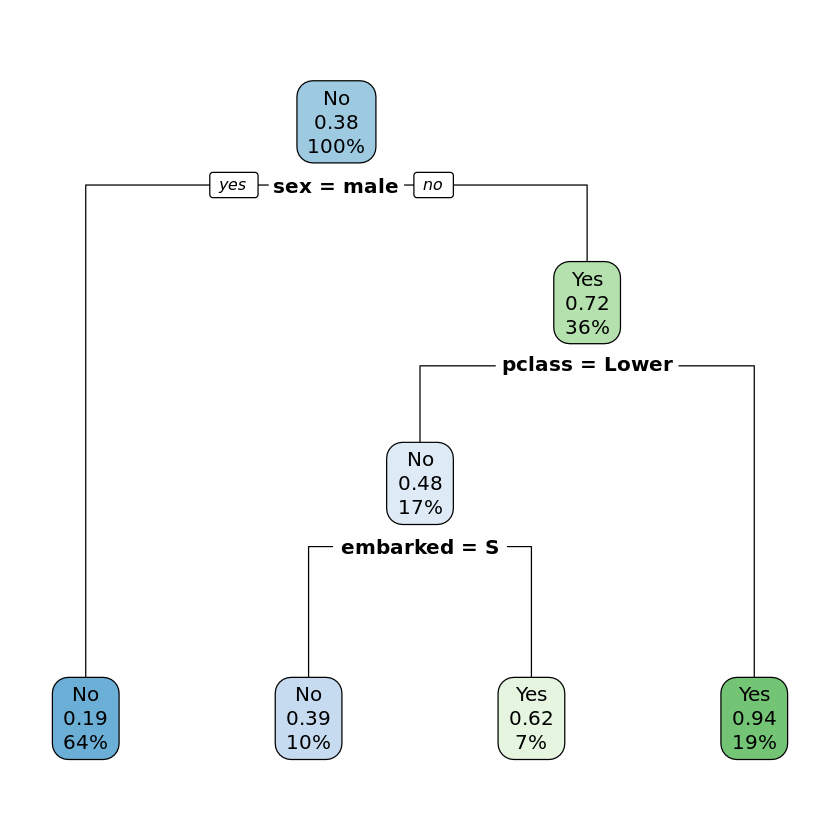

In [50]:
#plot the model
rpart.plot(model)

In [51]:
#summarize the model
summary(model)

Call:
rpart(formula = survived ~ pclass + sex + embarked, data = train_data, 
    method = "class")
  n= 1047 

    CP nsplit rel error xerror       xstd
1 0.41      0      1.00   1.00 0.03930509
2 0.03      1      0.59   0.59 0.03380128
3 0.01      3      0.53   0.53 0.03250707

Variable importance
     sex   pclass embarked 
      70       21        9 

Node number 1: 1047 observations,    complexity param=0.41
  predicted class=No   expected loss=0.3820439  P(node) =1
    class counts:   647   400
   probabilities: 0.618 0.382 
  left son=2 (673 obs) right son=3 (374 obs)
  Primary splits:
      sex      splits as  RL,   improve=132.32060, (0 missing)
      pclass   splits as  RRL,  improve= 38.08632, (0 missing)
      embarked splits as  RRLL, improve= 13.67990, (0 missing)
  Surrogate splits:
      embarked splits as  RLRL, agree=0.649, adj=0.019, (0 split)

Node number 2: 673 observations
  predicted class=No   expected loss=0.1946508  P(node) =0.6427889
    class counts:   542  

In [52]:
#predict the model
predicted_data <-predict(object = model,newdata=test_data,type='class')

In [53]:
#confusion matrix 
table_mat= table(test_data$survived,
                 predicted_data)

In [54]:
#Accuracy
sum(diag(table_mat))/sum(table_mat)


[1] 0.8129771